In [1]:
import pandas as pd

df = pd.read_csv("gesture_recognition_preprocessed_data.csv")
# rename the fucking column names+
rename = {old: chr(ord('X') + ((i - 3) // 20)) + '' + str((i - 3) % 20) if i >= 3 else old for i, old in
          enumerate(df.columns.values)}
df.rename(columns=rename, inplace=True)

# separate the person and sample columns, as they are only needed for gallery independent / depended training
persons = df[["person", "sample"]]
df.drop(columns=["person", "sample"], inplace=True)
df

,gesture,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19
0,left,-3.821744,-4.015376,-3.990985,-3.990985,-3.981707,-3.881300,-3.679140,-0.669628,-0.669628,...,-0.087388,-0.046088,0.065691,0.065691,0.012420,0.114473,-0.003891,-0.006434,-0.034117,-0.058957
1,right,0.110582,0.056807,-0.002339,-0.098367,-0.194529,-0.194529,-0.163853,0.005316,0.444936,...,-0.520140,-0.044340,0.449819,0.935668,1.084077,1.363230,1.373673,1.362002,1.197180,1.146823
2,up,4.460697,3.501819,3.403059,2.721294,-1.290530,-2.066960,-3.116928,-3.296808,-4.023117,...,-14.996059,-13.450255,-12.394309,-12.113014,-12.113014,-12.113014,-12.216911,-12.224881,-12.094932,-12.212973
3,down,-2.824111,-1.710594,-0.030825,-0.030825,-0.033818,0.075354,0.502263,0.923485,2.398352,...,-2.377112,5.780839,8.907927,7.623194,2.261646,-0.530103,-1.125314,-1.103010,-0.760758,-0.503231
4,square,0.023643,0.016610,0.077512,1.426692,3.290429,4.745008,3.859965,2.238728,2.288494,...,-2.874310,-4.336348,-0.729798,-0.159144,-0.002725,0.151882,-0.138564,0.530072,0.877774,0.368707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,down,-1.106271,-1.065719,-0.996736,0.055216,0.053271,0.050278,0.054468,0.084845,0.752228,...,-7.000347,-5.405060,-0.975039,2.083105,2.583792,2.604891,2.248455,1.088464,0.074220,-0.709731
2156,square,-1.171962,-0.911466,0.952924,1.197400,-0.281917,0.641914,3.963601,2.542516,-0.158766,...,-4.013241,0.870418,2.957753,-4.378349,-4.450223,-0.084845,-0.664092,-0.245555,-0.432752,-0.287753
2157,triangle,-0.067935,-0.190938,0.052680,0.661761,1.041123,2.603198,3.254665,0.259023,-0.466271,...,-2.884485,-2.685680,0.296716,1.587505,-1.647998,-3.003872,-3.225966,-0.832458,-0.458789,-0.528071
2158,circleCw,-0.211887,-0.176273,0.015665,0.608836,1.150516,1.969144,2.477518,3.317198,4.156287,...,1.642422,-0.072133,-4.448821,-4.316887,-2.010988,-1.532738,-0.843531,-0.420033,-0.168980,-0.005387


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gesture  2160 non-null   object 
 1   X0       2160 non-null   float64
 2   X1       2160 non-null   float64
 3   X2       2160 non-null   float64
 4   X3       2160 non-null   float64
 5   X4       2160 non-null   float64
 6   X5       2160 non-null   float64
 7   X6       2160 non-null   float64
 8   X7       2160 non-null   float64
 9   X8       2160 non-null   float64
 10  X9       2160 non-null   float64
 11  X10      2160 non-null   float64
 12  X11      2160 non-null   float64
 13  X12      2160 non-null   float64
 14  X13      2160 non-null   float64
 15  X14      2160 non-null   float64
 16  X15      2160 non-null   float64
 17  X16      2160 non-null   float64
 18  X17      2160 non-null   float64
 19  X18      2160 non-null   float64
 20  X19      2160 non-null   float64
 21  Y0       2160 

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
% store

def plot_gestures(df):
    gestures = df["gesture"].unique()
    fig, ax = plt.subplots(4, 2, figsize=(25, 20))

    for i, gesture in enumerate(gestures):
        cur_ax = ax[i % 4][i // 4]
        cur_ax.set_title(gesture)
        cur_ax.set_xticks(range(0, 61, 10))
        sns.lineplot(df[df["gesture"] == gesture][df.columns.values[1:]].transpose(), legend=False, ax=cur_ax)
    plt.show()

# plot_gestures(df)

Stored variables and their in-db values:


In [5]:
from scipy.signal import medfilt, wiener


def normalize(x):
    return (x - x.mean()) / x.std()


filtered_df = df[df.columns.values[1:]].apply(normalize)
# filtered_df = filtered_df[filtered_df.columns.values[1:]].apply(func=lambda x: medfilt(x, kernel_size=9))
# filtered_df = df[df.columns.values[1:]].apply(func=lambda x: wiener(x, mysize=9))
filtered_df = pd.concat([df[["gesture"]], filtered_df], axis=1)
filtered_df

,gesture,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19
0,left,-2.407940,-2.719250,-3.087907,-2.328847,-2.009276,-1.796563,-1.851493,-1.060170,-1.150908,...,-0.060400,-0.025650,0.016814,0.168196,0.237914,0.237977,0.147791,-0.005642,-0.103095,-0.103995
1,right,0.085900,0.074381,-0.094499,-0.345957,-0.486943,-0.610777,-0.783981,-0.862267,-0.827692,...,-0.160168,-0.025217,0.117534,0.392476,0.542442,0.668392,0.702250,0.744918,0.662834,0.637317
2,up,2.844697,2.437756,2.461192,1.090371,-0.927503,-1.213012,-1.680762,-1.830498,-2.123397,...,-3.497468,-3.345785,-3.250260,-2.971463,-3.207718,-3.976532,-4.767859,-6.707219,-7.605526,-7.576270
3,down,-1.775251,-1.138106,-0.115877,-0.311551,-0.422342,-0.523974,-0.581697,-0.593046,-0.261214,...,-0.588277,1.417647,2.335292,2.116514,0.877067,0.015807,-0.303574,-0.607092,-0.555101,-0.377134
4,square,0.030764,0.046805,-0.034572,0.430904,0.913907,0.977939,0.437961,-0.207397,-0.293072,...,-0.702902,-1.088322,-0.191767,0.110234,0.233610,0.250871,0.093586,0.288621,0.464148,0.158933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,down,-0.685815,-0.695703,-0.840776,-0.267722,-0.387334,-0.532039,-0.717682,-0.838948,-0.738579,...,-1.654124,-1.353036,-0.256070,0.688284,0.968609,1.096362,1.054343,0.594888,-0.035703,-0.504090
2156,square,-0.727476,-0.589882,0.622409,0.314104,-0.522070,-0.341750,0.469433,-0.118322,-1.002761,...,-0.965473,0.201364,0.775127,-0.977473,-1.030216,0.169277,-0.117935,-0.136795,-0.351065,-0.244658
2157,triangle,-0.027314,-0.095579,-0.053208,0.041250,0.009753,0.289063,0.254145,-0.787876,-1.091935,...,-0.705247,-0.679461,0.077390,0.560519,-0.233920,-0.836839,-1.149071,-0.458699,-0.367261,-0.392405
2158,circleCw,-0.118607,-0.085518,-0.080987,0.014291,0.053726,0.085131,0.018143,0.108826,0.248575,...,0.338393,-0.032101,-1.166913,-0.961629,-0.337069,-0.329776,-0.190158,-0.232492,-0.186986,-0.071060


In [6]:
% store
# plot_gestures(filtered_df)

Stored variables and their in-db values:


#### Add features

##### Add the length of each sample as a feature

<AxesSubplot: xlabel='gesture', ylabel='sample_length'>

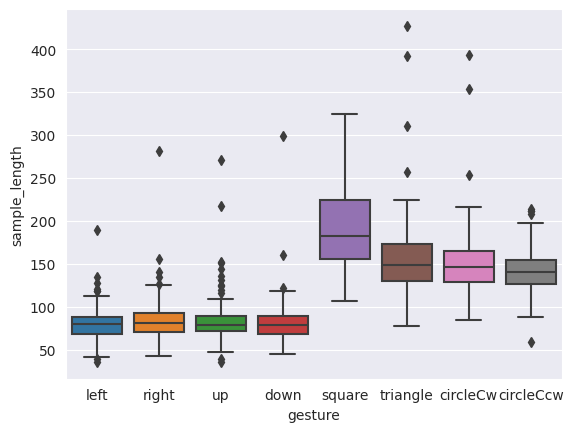

In [7]:
wear_x = pd.read_csv("raw/wear/raw_data_wear_x.csv", header=None)
filtered_df["sample_length"] = wear_x.count(axis='columns')
sns.boxplot(filtered_df, x="gesture", y="sample_length")

### Build up ML toolchain

In [8]:
y = df["gesture"]
filtered_df.drop(columns=["gesture"], inplace=True)
X = filtered_df
X.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,sample_length
count,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,...,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2160.000000
mean,2.631640e-17,-1.315820e-17,-3.947460e-17,6.579099e-18,3.289550e-18,-1.973730e-17,-1.052656e-16,1.315820e-16,2.631640e-17,-1.710566e-16,...,3.947460e-17,-1.973730e-17,-2.631640e-17,3.618505e-17,-1.069104e-17,-1.644775e-17,1.315820e-17,3.289550e-18,-3.618505e-17,119.893056
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,50.359340
min,-8.103090e+00,-8.501023e+00,-9.012202e+00,-6.258444e+00,-5.370405e+00,-4.705645e+00,-4.220721e+00,-4.296981e+00,-3.766508e+00,-3.893215e+00,...,-3.495345e+00,-3.451583e+00,-2.971463e+00,-3.207718e+00,-3.976532e+00,-5.854414e+00,-6.707219e+00,-7.605526e+00,-7.576270e+00,36.000000
25%,-2.566840e-01,-1.965337e-01,-1.977723e-01,-3.211327e-01,-4.121764e-01,-5.360686e-01,-6.786928e-01,-7.033489e-01,-7.437903e-01,-6.731763e-01,...,-5.578662e-01,-6.012642e-01,-7.216369e-01,-6.992047e-01,-5.625913e-01,-3.018454e-01,-2.877159e-01,-2.672766e-01,-2.657945e-01,79.000000
50%,-3.229628e-02,2.427647e-03,-8.118826e-02,-2.477130e-01,-3.123877e-01,-2.980657e-01,-2.196174e-01,-1.779320e-01,-1.394123e-01,-1.143369e-01,...,-5.194676e-02,-6.814570e-02,-6.177207e-02,-7.247389e-03,6.036264e-02,7.349806e-02,-3.283409e-02,-7.138780e-02,-5.638630e-02,107.000000
75%,1.175961e-01,1.191160e-01,9.981042e-02,4.218886e-02,1.322087e-01,2.323940e-01,3.394928e-01,4.007123e-01,5.369316e-01,5.344734e-01,...,5.108733e-01,5.226168e-01,5.441238e-01,4.816618e-01,3.912357e-01,3.227406e-01,2.080110e-01,1.320615e-01,1.439602e-01,153.000000
max,1.144697e+01,9.639250e+00,6.559672e+00,1.252500e+01,1.030942e+01,7.080420e+00,6.828346e+00,6.410765e+00,6.024358e+00,5.675638e+00,...,5.505949e+00,4.480034e+00,4.511658e+00,5.052992e+00,6.052641e+00,6.758910e+00,8.781780e+00,9.793345e+00,9.583660e+00,427.000000


#### Outlier removal

In [9]:
q_max = X.quantile(.99)
q_min = X.quantile(.01)

X.clip(lower=q_min, upper=q_max, axis=1, inplace=True)
X.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,sample_length
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,0.003206,0.011476,0.011492,-0.012150,-0.020234,-0.002487,0.000942,-0.001220,-0.002096,-0.005816,...,-0.003228,-0.005610,-0.004836,-0.006348,-0.006676,-0.005459,-0.007410,-0.008211,-0.007734,119.587491
std,0.808591,0.809294,0.807492,0.727068,0.745262,0.907481,0.932292,0.927284,0.943231,0.938118,...,0.958554,0.958025,0.964956,0.957594,0.942392,0.903450,0.844381,0.801610,0.827246,48.921414
min,-2.751609,-3.117098,-3.038251,-1.337921,-1.217669,-1.333192,-1.580442,-1.710385,-1.974565,-2.223656,...,-2.438942,-2.223371,-1.857839,-2.015401,-2.150119,-2.675452,-2.572129,-2.459723,-2.660318,48.590000
25%,-0.256684,-0.196534,-0.197772,-0.321133,-0.412176,-0.536069,-0.678693,-0.703349,-0.743790,-0.673176,...,-0.557866,-0.601264,-0.721637,-0.699205,-0.562591,-0.301845,-0.287716,-0.267277,-0.265795,79.000000
50%,-0.032296,0.002428,-0.081188,-0.247713,-0.312388,-0.298066,-0.219617,-0.177932,-0.139412,-0.114337,...,-0.051947,-0.068146,-0.061772,-0.007247,0.060363,0.073498,-0.032834,-0.071388,-0.056386,107.000000
75%,0.117596,0.119116,0.099810,0.042189,0.132209,0.232394,0.339493,0.400712,0.536932,0.534473,...,0.510873,0.522617,0.544124,0.481662,0.391236,0.322741,0.208011,0.132061,0.143960,153.000000
max,3.592349,3.198119,3.247326,3.843824,3.771877,4.541017,4.268408,3.588064,2.955080,2.656469,...,3.087476,2.699686,2.674891,2.966967,3.351332,3.317703,4.110539,4.311653,4.275503,268.000000


### Scaling

In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X, y)

X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,sample_length
0,-2.982603,-3.374990,-3.777684,-1.823870,-1.607103,-1.466711,-1.696625,-1.142255,-1.218235,-1.379497,...,-0.023396,0.023412,0.179358,0.255138,0.259668,0.169667,0.002095,-0.118394,-0.116390,-1.451592
1,0.102293,0.077747,-0.131290,-0.459220,-0.626380,-0.670461,-0.842123,-0.928783,-0.875487,-0.886831,...,-0.022944,0.128569,0.411836,0.573225,0.716500,0.783522,0.891189,0.837315,0.779939,-1.402318
2,3.514943,2.998715,3.034416,1.516745,-1.217665,-1.334248,-1.696625,-1.843621,-2.091667,-2.364686,...,-2.541616,-2.315468,-1.920743,-2.098507,-2.274998,-2.956014,-3.038100,-3.058943,-3.207267,-1.443209
3,-2.199963,-1.420804,-0.157771,-0.411888,-0.539678,-0.574786,-0.625098,-0.638384,-0.274777,0.697968,...,1.482654,2.444034,2.198900,0.922750,0.023863,-0.330050,-0.710368,-0.682398,-0.446645,-0.768502
4,0.034090,0.043664,-0.057059,0.609513,1.253730,1.080632,0.468866,-0.222397,-0.308560,0.124240,...,-1.132273,-0.194359,0.119277,0.250643,0.273353,0.109655,0.350671,0.589399,0.201519,-0.052903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,-0.852324,-0.874025,-1.055696,-0.351591,-0.492694,-0.583675,-0.770993,-0.903630,-0.780989,-0.641517,...,-1.408496,-0.261495,0.718458,1.018368,1.170737,1.173332,0.713467,-0.034304,-0.600149,-0.809393
2156,-0.903858,-0.743237,0.756736,0.448829,-0.673525,-0.373937,0.502631,-0.126314,-1.061136,-0.425792,...,0.213488,0.815133,-1.008194,-1.069456,0.186752,-0.124525,-0.153266,-0.427806,-0.286467,1.378295
2157,-0.037753,-0.132312,-0.080143,0.073463,0.040246,0.321349,0.271655,-0.848541,-1.155699,-0.937755,...,-0.705635,0.086656,0.586023,-0.237705,-0.881115,-1.266120,-0.534586,-0.448015,-0.465110,0.826261
2158,-0.150683,-0.119878,-0.114554,0.036375,0.099263,0.096573,0.018455,0.118703,0.265819,0.377215,...,-0.030128,-1.212466,-0.991770,-0.345446,-0.342931,-0.204485,-0.266627,-0.223071,-0.076568,0.499130


#### Density plots before/after

<AxesSubplot: title={'center': 'after scaling'}, ylabel='Density'>

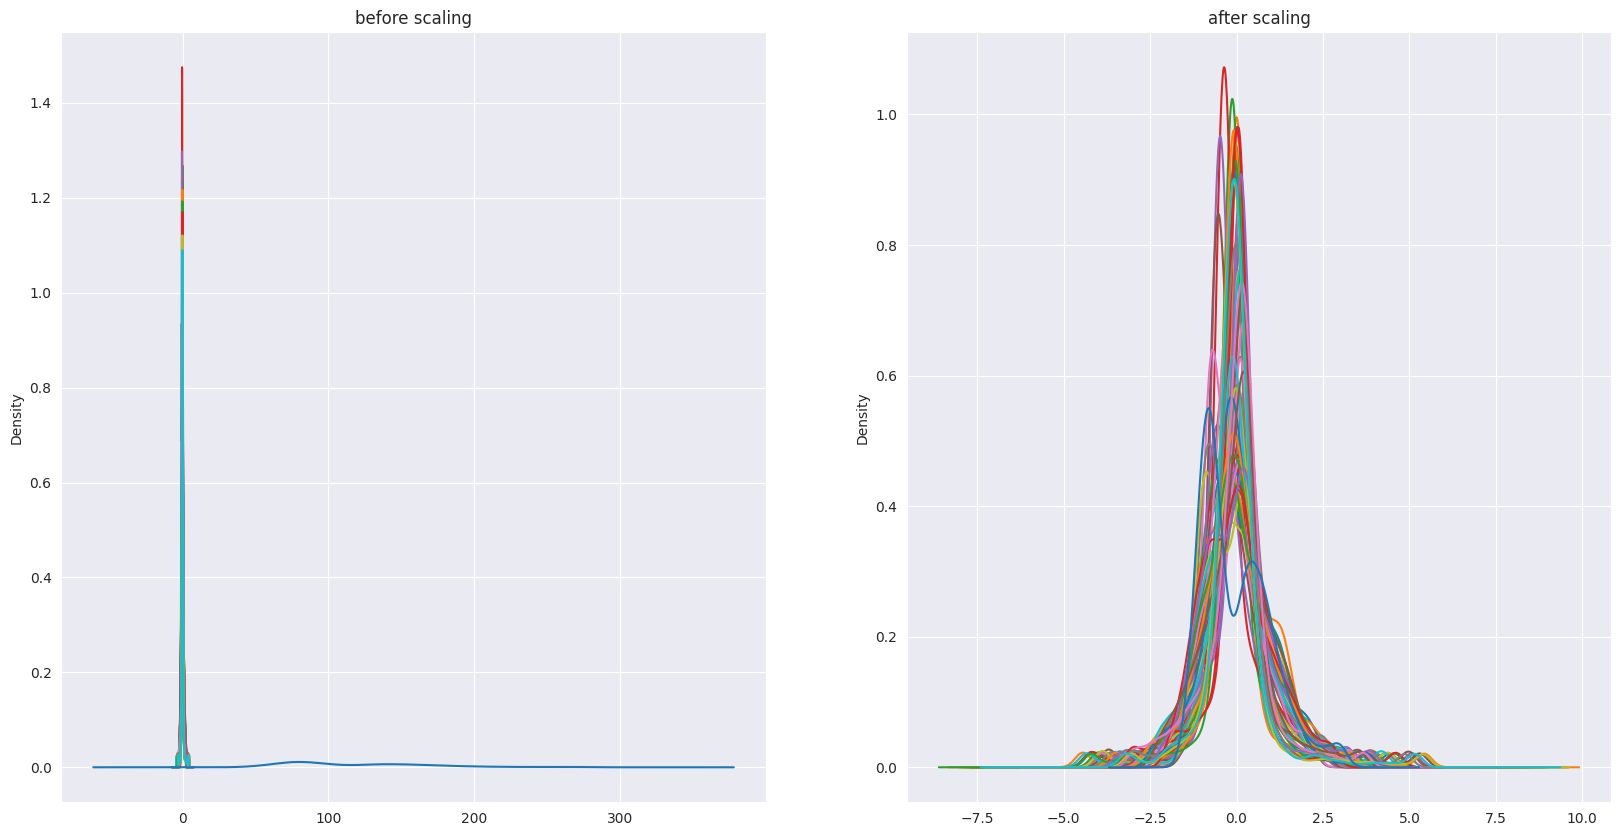

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title("before scaling")

fig.set_size_inches(20, 10)
X.plot.density(ax=ax1, legend=False)

ax2.set_title("after scaling")
X_scaled.plot.density(ax=ax2, legend=False)


In [12]:
# plot_gestures(pd.concat([y, X_scaled], axis=1))

### Add features

#### Temporal domain features

We thought that maybe we could gain additional knowledge by adding the derivatives of the preprocessed data as features.

In [13]:
import numpy as np

x_columns = ["X" + str(i) for i in range(0, 20)]
y_columns = ["Y" + str(i) for i in range(0, 20)]
z_columns = ["Z" + str(i) for i in range(0, 20)]
# Calculate the first derivative (acceleration) of the acceleration data
der_1_x = np.diff(X_scaled[x_columns].values, axis=1)
der_1_y = np.diff(X_scaled[y_columns].values, axis=1)
der_1_z = np.diff(X_scaled[z_columns].values, axis=1)

# Calculate the second derivative (jerk) of the acceleration data
der_2_x = np.diff(der_1_x, axis=1)
der_2_y = np.diff(der_1_y, axis=1)
der_2_z = np.diff(der_1_z, axis=1)

# Add the acceleration and jerk data as new features to the DataFrame
temporal_domain_features = pd.concat([
    pd.DataFrame(der_1_x, columns=["x'" + str(i) for i in range(0, 19)]),
    pd.DataFrame(der_1_y, columns=["y'" + str(i) for i in range(0, 19)]),
    pd.DataFrame(der_1_z, columns=["z'" + str(i) for i in range(0, 19)]),
    pd.DataFrame(der_2_x, columns=["x''" + str(i) for i in range(0, 18)]),
    pd.DataFrame(der_2_y, columns=["y''" + str(i) for i in range(0, 18)]),
    pd.DataFrame(der_2_z, columns=["z''" + str(i) for i in range(0, 18)]),

], axis=1)

#### Frequency domain features:

Next we tried to gain more knowledge by including features of the frequency domain such as information from the fft.

In [14]:
from scipy.fft import dct

# Calculate the fast Fourier transform (FFT) of the acceleration data
fft_x = np.fft.fft(X_scaled[x_columns].values, axis=1)
fft_y = np.fft.fft(X_scaled[y_columns].values, axis=1)
fft_z = np.fft.fft(X_scaled[z_columns].values, axis=1)

# Calculate the power spectral density (PSD) of the acceleration data
psd_x = np.abs(fft_x) ** 2
psd_y = np.abs(fft_y) ** 2
psd_z = np.abs(fft_z) ** 2

# Calculate the dominant frequency of the acceleration data
dominant_freq_x = np.argmax(psd_x, axis=1) / len(X_scaled)
dominant_freq_y = np.argmax(psd_y, axis=1) / len(X_scaled)
dominant_freq_z = np.argmax(psd_z, axis=1) / len(X_scaled)

frequency_domain_features = pd.concat([
    pd.DataFrame(psd_x, columns=["psd_x'" + str(i) for i in range(0, 20)]),
    pd.DataFrame(psd_y, columns=["psd_y'" + str(i) for i in range(0, 20)]),
    pd.DataFrame(psd_z, columns=["psd_z'" + str(i) for i in range(0, 20)]),
    pd.DataFrame(dominant_freq_x, columns=["dom_f_x"]),
    pd.DataFrame(dominant_freq_y, columns=["dom_f_y"]),
    pd.DataFrame(dominant_freq_z, columns=["dom_f_z"]),

], axis=1)

Through testing the models with various feature reduction, we came to the conclusion, that our additional features do not add any real value.
Adding the `temporal_domain_features`  makes the models perform way worse avg scores from 0.5 - 0.65.
Adding the `frequency_domain_features`  has the same effect, just not quite as harsh, as the avg score stick around 0.65 - 0.7.

So we concluded that we should not add these features, as the just harm the model performance.

In [15]:
X_scaled = pd.concat([
    X_scaled,
    # temporal_domain_features, # uncomment to see effect
    # frequency_domain_features # uncomment to see effect
], axis=1)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X0             2160 non-null   float64
 1   X1             2160 non-null   float64
 2   X2             2160 non-null   float64
 3   X3             2160 non-null   float64
 4   X4             2160 non-null   float64
 5   X5             2160 non-null   float64
 6   X6             2160 non-null   float64
 7   X7             2160 non-null   float64
 8   X8             2160 non-null   float64
 9   X9             2160 non-null   float64
 10  X10            2160 non-null   float64
 11  X11            2160 non-null   float64
 12  X12            2160 non-null   float64
 13  X13            2160 non-null   float64
 14  X14            2160 non-null   float64
 15  X15            2160 non-null   float64
 16  X16            2160 non-null   float64
 17  X17            2160 non-null   float64
 18  X18     

#### Create train test split

remove some person from the data to do an gallery independent validation

In [16]:
# create a list of the person ids to be filtered
# filtered_person_ids = [1, 5, 8]
#
# # create a boolean mask indicating which rows should be included in the new dataframe
# mask = persons['person'].isin(filtered_person_ids)
#
# # create a new dataframe with only the desired rows
# X_gallery_independent = X_scaled[mask].reset_index(drop=True)
# y_gallery_independent = y.loc[mask].reset_index(drop=True)
#
# X_scaled = X_scaled[~mask].reset_index(drop=True)
# persons = persons[~mask].reset_index(drop=True)
# y = y.loc[~mask].reset_index(drop=True)

use stratified shuffle split to create a gallery dependent training/test set

create a gallery independent held back test set

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit, LeavePGroupsOut

# Create the stratified shuffle split object
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
lpo = LeavePGroupsOut(n_groups=3)
# X_train, X_test, y_train, y_test = [], [], [], []

# Loop through the splits and assign the train and test sets
#for train_index, test_index in stratified_split.split(X_scaled, persons["person"]):
train_index, test_index = lpo.split(X_scaled, groups=persons["person"]).__next__()
X_train = X_scaled.loc[train_index]
X_test = X_scaled.loc[test_index]
y_train = y.loc[train_index]
y_test = y.loc[test_index]
persons = persons.loc[train_index]

#### Feature reduction

We decided to try different feature selection strategies and compare their results.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Create an instance of SelectKBest
selector = SelectKBest(f_classif, k=20)
label_encoder = LabelEncoder()
label_encoder.fit(y)
train = label_encoder.transform(y_train)
# Fit the selector to the data
selector.fit(X_train, train)

# Get the selected features
kbest_X_train = selector.transform(X_train)
kbest_X_test = selector.transform(X_test)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
lr = LinearRegression()
label_encoder = LabelEncoder()
label_encoder.fit(y)
train = label_encoder.transform(y_train)
# Create an instance of RFE
rfe = RFE(lr, n_features_to_select=20)

# Fit the RFE to the data
rfe.fit(X_train, train)

# Get the selected features
rfe_X_train = rfe.transform(X_train)
rfe_X_test = rfe.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)  # if features are added, change n_components >= 20 to achieve similar performance
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

### Model Training
* Train different classification models to distinguish between the three Iris Plant Species:
    * Use the following models: k Nearest Neighbour, Decision Tree, Support Vector Machine


#### KNN

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, neural_network


def knn_grid_search(X_train, y_train):
    knn = GridSearchCV(
        estimator=neighbors.KNeighborsClassifier(),
        param_grid=[{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'leaf_size': [10, 15, 20]}],
        scoring="accuracy",
        cv=lpo.split(X_train, groups=persons["person"]),
        return_train_score=True
    )
    knn.fit(X_train, y_train)
    print(knn.best_params_)
    return knn, knn.best_params_


def knn_with_best_params(X_train, y_train, params):
    knn = neighbors.KNeighborsClassifier(n_neighbors=params["n_neighbors"], weights=params["weights"],
                                         leaf_size=params["leaf_size"])
    knn.fit(X_train, y_train)
    return knn, params

#### Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier


def tree_grid_search(X_train, y_train):
    tree = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid=[{
            'splitter': ['best', 'random'],
            'max_depth': [10, 100, 1000],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'class_weight': ['balanced']}],
        scoring="accuracy",
        cv=lpo.split(X_train, groups=persons["person"]),
    )

    tree.fit(X_train, y_train)
    print(tree.best_params_)
    return tree, tree.best_params_


def tree_with_best_params(X_train, y_train, params):
    tree = DecisionTreeClassifier(splitter=params["splitter"], max_depth=params["max_depth"],
                                  criterion=params["criterion"], class_weight=params["class_weight"])
    tree.fit(X_train, y_train)
    return tree, params


#### SVM

In [23]:
from sklearn.utils.fixes import loguniform
from sklearn import svm as subvector


def svm_grid_search(X_train, y_train):
    svc = GridSearchCV(
        estimator=subvector.SVC(),
        param_grid=[{
            'C': loguniform(0.1, 1, 100, 1000).rvs(20),
            'class_weight': ['balanced'],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': loguniform(0.000035, 0.000245).rvs(20)
        }],
        cv=lpo.split(X_train, groups=persons["person"]),
    )
    svc.fit(X_train, y_train)
    print(svc.best_params_)
    return svc, svc.best_params_


def svm_with_best_params(X_train, y_train, params):
    svc = subvector.SVC(C=params["C"], class_weight=params["class_weight"], kernel=params["kernel"],
                        gamma=params["gamma"])
    svc.fit(X_train, y_train)
    return svc, params

#### Neural Network playground

In [24]:
def nn_grid_search(X_train, y_train):
    nn = GridSearchCV(
        estimator=neural_network.MLPClassifier(max_iter=10000),
        param_grid=[{
            'hidden_layer_sizes': [6, 9, 12],
            'activation': ['identity', 'logistic', 'relu'],
            'solver': ['lbfgs', 'sgd'],
            'learning_rate': ['constant', 'adaptive']
        }],
        cv=lpo.split(X_train, groups=persons["person"]),
    )
    nn.fit(X_train, y_train)
    print(nn.best_params_)
    return nn, nn.best_params_


def nn_with_best_params(X_train, y_train, params):
    nn = neural_network.MLPClassifier(max_iter=10000, hidden_layer_sizes=params["hidden_layer_sizes"],
                                      activation=params["activation"], solver=params["solver"],
                                      learning_rate=params["learning_rate"])
    nn.fit(X_train, y_train)
    return nn, params

* Use different hyperparameter settings for each model and explain why and how you chose them
    * We selected each hyperparameter by trying different combinations, and then using the best fitting hyperparameters.

### Performance Estimates
* Estimate the models’ performances on the held back test set:

In [25]:
models = {}
best_params = {  # from previous runs
    # stratified kFold
    # "kBest": {
    #     "knn":  {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
    #     "tree": {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 1000, 'splitter': 'best'},
    #     "svm":  {'C': 696.6186904262564, 'class_weight': 'balanced', 'gamma': 0.0002171766176033019, 'kernel': 'rbf'},
    #     "nn":   {'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'solver': 'sgd'}
    # },
    # "rfe": {
    #     "knn":  {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
    #     "tree": {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 1000, 'splitter': 'best'},
    #     "svm":  {'C': 439.8789649591561, 'class_weight': 'balanced', 'gamma': 0.00022595356458860057, 'kernel': 'rbf'},
    #     "nn":   {'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'solver': 'sgd'},
    # },
    # "pca":{
    #     "knn":  {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
    #     "tree": {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1000, 'splitter': 'best'},
    #     "svm":  {'C': 671.3171466128516, 'class_weight': 'balanced', 'gamma': 0.000219343943890147, 'kernel': 'rbf'},
    #     "nn":   {'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'solver': 'sgd'}
    # }

    # LeavePGroupsOut
    'kBest': {
        'knn': {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
        'tree': {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 1000, 'splitter': 'best'},
        'svm': {'C': 250.43824344261557, 'class_weight': 'balanced', 'gamma': 0.00011061785085783135, 'kernel': 'rbf'},
        'nn': {'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'solver': 'sgd'}},
    'rfe': {
        'knn': {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
        'tree': {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 1000, 'splitter': 'best'},
        'svm': {'C': 290.8914790517189, 'class_weight': 'balanced', 'gamma': 0.00019097771435651768, 'kernel': 'rbf'},
        'nn': {'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'solver': 'sgd'}},
    'pca': {
        'knn': {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
        'tree': {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'},
        'svm': {'C': 441.56256433963625, 'class_weight': 'balanced', 'gamma': 0.00024300338475905441, 'kernel': 'rbf'},
        'nn': {'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'solver': 'sgd'}}
}
for m, X_train, X_test in [("kBest", kbest_X_train, kbest_X_test), ("rfe", rfe_X_train, rfe_X_test),
                           ("pca", pca_X_train, pca_X_test)]:
    params = best_params.get(m)
    if params is None:
        knn = knn_grid_search(X_train, y_train)
        tree = tree_grid_search(X_train, y_train)
        svm = svm_grid_search(X_train, y_train)
        nn = nn_grid_search(X_train, y_train)
    else:
        knn = knn_with_best_params(X_train, y_train, params.get("knn"))
        tree = tree_with_best_params(X_train, y_train, params.get("tree"))
        svm = svm_with_best_params(X_train, y_train, params.get("svm"))
        nn = nn_with_best_params(X_train, y_train, params.get("nn"))
    models[m] = (X_test, {"knn": knn[0], "tree": tree[0], "svm": svm[0], "nn": nn[0]})
    best_params[m] = {"knn": knn[1], "tree": tree[1], "svm": svm[1], "nn": nn[1]}
    print(m, "done")

{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
{'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 1000, 'splitter': 'best'}
{'C': 250.43824344261557, 'class_weight': 'balanced', 'gamma': 0.00011061785085783135, 'kernel': 'rbf'}
{'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'solver': 'sgd'}
kBest done
{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 1000, 'splitter': 'best'}
{'C': 290.8914790517189, 'class_weight': 'balanced', 'gamma': 0.00019097771435651768, 'kernel': 'rbf'}
{'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'solver': 'sgd'}
rfe done
{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
{'C': 441.56256433963625, 'class_weight': 'balanced', 'gamma': 0.00024300338475905441, 'kernel': 'rbf'}


/home/fabian/fh/ml/notebooks/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'relu', 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'solver': 'sgd'}
pca done


start 18:00
end 06:00

In [26]:
best_params

{'kBest': {'knn': {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
  'tree': {'class_weight': 'balanced',
   'criterion': 'log_loss',
   'max_depth': 1000,
   'splitter': 'best'},
  'svm': {'C': 250.43824344261557,
   'class_weight': 'balanced',
   'gamma': 0.00011061785085783135,
   'kernel': 'rbf'},
  'nn': {'activation': 'relu',
   'hidden_layer_sizes': 12,
   'learning_rate': 'constant',
   'solver': 'sgd'}},
 'rfe': {'knn': {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
  'tree': {'class_weight': 'balanced',
   'criterion': 'entropy',
   'max_depth': 1000,
   'splitter': 'best'},
  'svm': {'C': 290.8914790517189,
   'class_weight': 'balanced',
   'gamma': 0.00019097771435651768,
   'kernel': 'rbf'},
  'nn': {'activation': 'relu',
   'hidden_layer_sizes': 12,
   'learning_rate': 'adaptive',
   'solver': 'sgd'}},
 'pca': {'knn': {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'},
  'tree': {'class_weight': 'balanced',
   'criterion': 'entropy',
   'ma

* Compare the models with their hyperparameter settings with two different error / performance measures

#### Gallery dependent evaluation

kBest feature selection
KNN
              precision    recall  f1-score   support

   circleCcw       0.96      0.98      0.97        90
    circleCw       0.99      0.92      0.95        90
        down       0.91      0.97      0.94        90
        left       0.92      0.96      0.94        90
       right       0.90      0.92      0.91        90
      square       0.97      0.96      0.96        90
    triangle       0.96      0.91      0.94        90
          up       0.96      0.94      0.95        90

    accuracy                           0.94       720
   macro avg       0.95      0.94      0.94       720
weighted avg       0.95      0.94      0.94       720



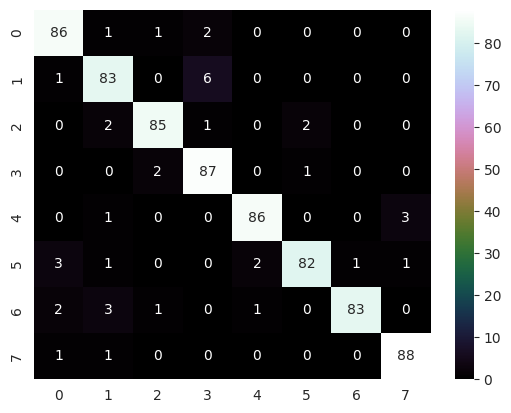

Tree
              precision    recall  f1-score   support

   circleCcw       0.93      0.74      0.83        90
    circleCw       0.70      0.64      0.67        90
        down       0.67      0.77      0.72        90
        left       0.88      0.90      0.89        90
       right       0.83      0.77      0.80        90
      square       0.84      0.90      0.87        90
    triangle       0.81      0.88      0.84        90
          up       0.74      0.76      0.75        90

    accuracy                           0.79       720
   macro avg       0.80      0.79      0.79       720
weighted avg       0.80      0.79      0.79       720



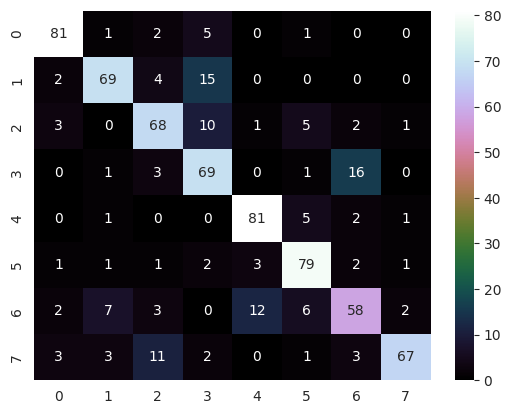

SVM
              precision    recall  f1-score   support

   circleCcw       0.94      0.97      0.95        90
    circleCw       0.86      0.77      0.81        90
        down       0.85      0.97      0.91        90
        left       0.86      0.92      0.89        90
       right       0.80      0.82      0.81        90
      square       0.91      0.88      0.89        90
    triangle       0.84      0.84      0.84        90
          up       0.97      0.84      0.90        90

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



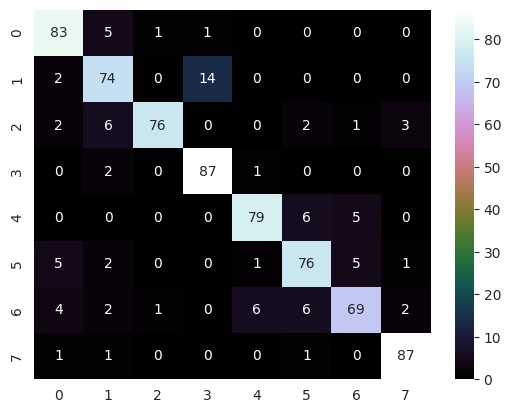

NN
              precision    recall  f1-score   support

   circleCcw       0.98      0.97      0.97        90
    circleCw       0.89      0.76      0.82        90
        down       0.81      0.97      0.88        90
        left       0.93      0.92      0.93        90
       right       0.84      0.80      0.82        90
      square       0.91      0.90      0.91        90
    triangle       0.83      0.90      0.86        90
          up       0.95      0.90      0.93        90

    accuracy                           0.89       720
   macro avg       0.89      0.89      0.89       720
weighted avg       0.89      0.89      0.89       720



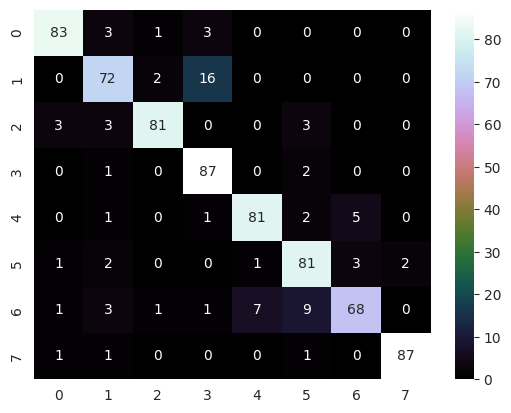

rfe feature selection
KNN
              precision    recall  f1-score   support

   circleCcw       0.92      0.98      0.95        90
    circleCw       0.89      0.89      0.89        90
        down       0.99      0.98      0.98        90
        left       0.83      0.91      0.87        90
       right       0.82      0.82      0.82        90
      square       0.97      0.82      0.89        90
    triangle       0.88      0.91      0.90        90
          up       0.94      0.91      0.93        90

    accuracy                           0.90       720
   macro avg       0.91      0.90      0.90       720
weighted avg       0.91      0.90      0.90       720



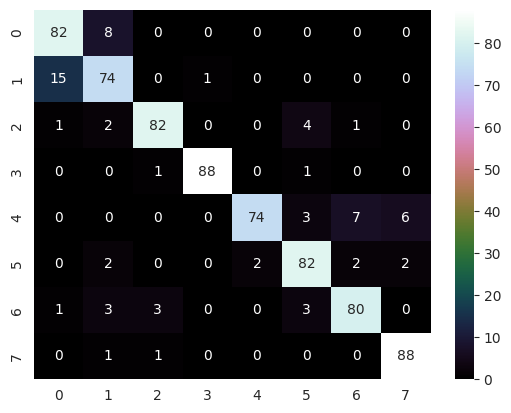

Tree
              precision    recall  f1-score   support

   circleCcw       0.86      0.79      0.82        90
    circleCw       0.79      0.66      0.72        90
        down       0.71      0.97      0.82        90
        left       0.66      0.70      0.68        90
       right       0.71      0.71      0.71        90
      square       0.81      0.78      0.80        90
    triangle       0.81      0.80      0.80        90
          up       0.85      0.76      0.80        90

    accuracy                           0.77       720
   macro avg       0.78      0.77      0.77       720
weighted avg       0.78      0.77      0.77       720



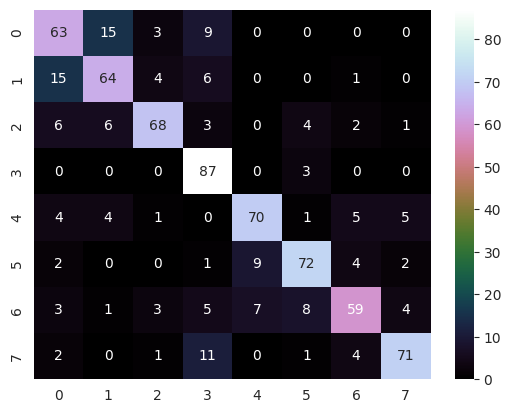

SVM
              precision    recall  f1-score   support

   circleCcw       0.91      0.96      0.93        90
    circleCw       0.76      0.81      0.78        90
        down       0.88      0.98      0.93        90
        left       0.80      0.84      0.82        90
       right       0.76      0.72      0.74        90
      square       0.90      0.71      0.80        90
    triangle       0.83      0.89      0.86        90
          up       0.95      0.87      0.91        90

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720



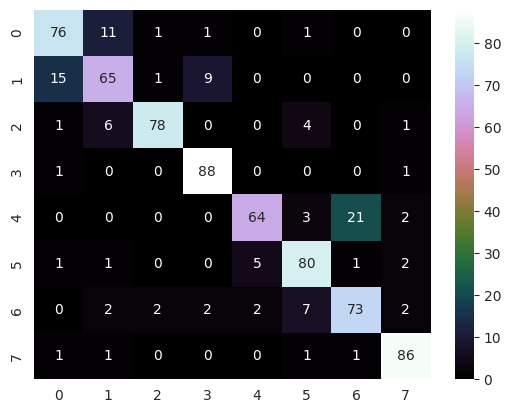

NN
              precision    recall  f1-score   support

   circleCcw       0.90      0.98      0.94        90
    circleCw       0.79      0.82      0.80        90
        down       0.90      0.84      0.87        90
        left       0.77      0.93      0.84        90
       right       0.85      0.73      0.79        90
      square       0.85      0.71      0.78        90
    triangle       0.85      0.88      0.86        90
          up       0.93      0.92      0.93        90

    accuracy                           0.85       720
   macro avg       0.86      0.85      0.85       720
weighted avg       0.86      0.85      0.85       720



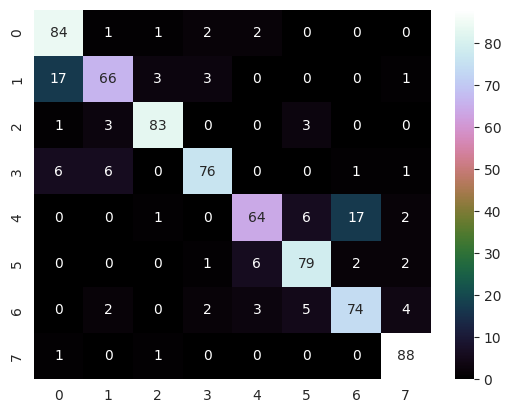

pca feature selection
KNN
              precision    recall  f1-score   support

   circleCcw       0.95      0.98      0.96        90
    circleCw       0.95      0.91      0.93        90
        down       0.98      0.99      0.98        90
        left       0.84      0.97      0.90        90
       right       0.92      0.96      0.94        90
      square       0.97      0.87      0.92        90
    triangle       0.95      0.90      0.93        90
          up       0.94      0.93      0.94        90

    accuracy                           0.94       720
   macro avg       0.94      0.94      0.94       720
weighted avg       0.94      0.94      0.94       720



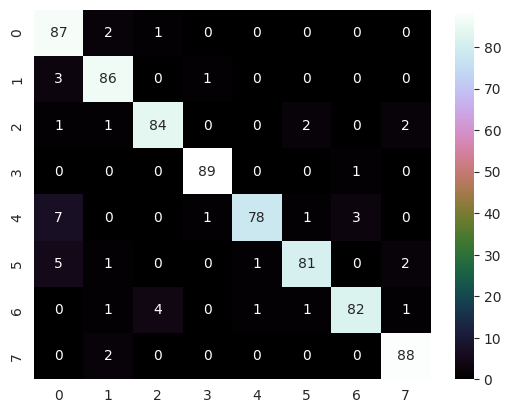

Tree
              precision    recall  f1-score   support

   circleCcw       0.85      0.87      0.86        90
    circleCw       0.69      0.67      0.68        90
        down       0.74      0.84      0.79        90
        left       0.68      0.70      0.69        90
       right       0.51      0.70      0.59        90
      square       0.70      0.73      0.72        90
    triangle       0.86      0.69      0.77        90
          up       0.80      0.50      0.62        90

    accuracy                           0.71       720
   macro avg       0.73      0.71      0.71       720
weighted avg       0.73      0.71      0.71       720



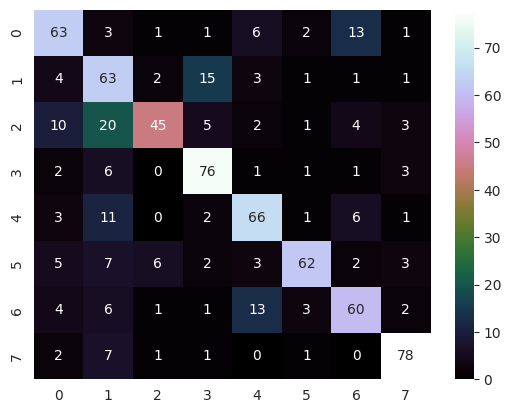

SVM
              precision    recall  f1-score   support

   circleCcw       0.91      0.97      0.94        90
    circleCw       0.82      0.83      0.83        90
        down       0.90      0.87      0.88        90
        left       0.80      0.94      0.87        90
       right       0.89      0.88      0.88        90
      square       0.90      0.84      0.87        90
    triangle       0.89      0.89      0.89        90
          up       0.96      0.82      0.89        90

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



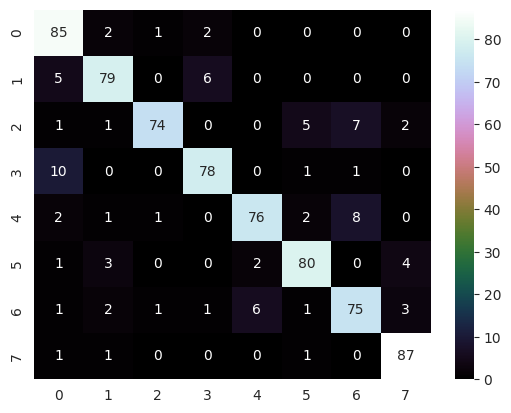

NN
              precision    recall  f1-score   support

   circleCcw       0.90      0.94      0.92        90
    circleCw       0.81      0.80      0.80        90
        down       0.79      0.93      0.86        90
        left       0.86      0.91      0.89        90
       right       0.82      0.81      0.82        90
      square       0.91      0.79      0.85        90
    triangle       0.91      0.87      0.89        90
          up       0.95      0.88      0.91        90

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



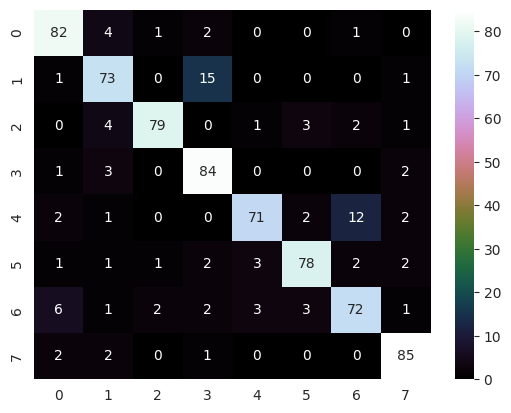

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

gestures = df["gesture"].unique()

def print_classification_reports(model_name, model, X_test, y_test):
    print(model_name)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=gestures)
    sns.heatmap(cm, annot=True, cmap="cubehelix")
    plt.show()

for key, val in models.items():
    print(key + " feature selection")
    X_test = val[0]
    print_classification_reports("KNN", val[1]["knn"], X_test, y_test)
    print_classification_reports("Tree", val[1]["tree"], X_test, y_test)
    print_classification_reports("SVM", val[1]["svm"], X_test, y_test)
    print_classification_reports("NN", val[1]["nn"], X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

gestures = df["gesture"].unique()
# calculate the confusion matrices for each model
confusion_matrix_1 = confusion_matrix(y_test, knn_y_predict, labels=gestures)
confusion_matrix_2 = confusion_matrix(y_test, tree_y_predict)
confusion_matrix_3 = confusion_matrix(y_test, svm_y_predict)
confusion_matrix_4 = confusion_matrix(y_test, nn_y_predict)
confusion_matrices = {
    0: ("KNN", confusion_matrix_1),
    1: ("Tree", confusion_matrix_2),
    2: ("svm", confusion_matrix_3),
    3: ("nn", confusion_matrix_4)
}
# plot the confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

k = 0
for i in range(0, len(axs)):
    for j in range(0, len(axs[i])):
        sns.heatmap(confusion_matrices[k][1], annot=True, ax=axs[i, j], cmap="cubehelix")
        axs[i, j].xaxis.set_ticklabels(gestures)
        axs[i, j].yaxis.set_ticklabels(gestures)
        axs[i, j].set_title(confusion_matrices[k][0])
        k += 1

plt.show()